In [19]:
import sys
sys.path.append("../")
from script.experience import aggregate_information, compute_list_values, compute_report, perform_clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("../data/cleaned_data.csv")

avg_tcp_retransmission, avg_rtt, handset_type, avg_throughput = aggregate_information(df)
top_10_tcp_values, bottom_10_tcp_values, most_frequent_tcp_values, \
top_10_rtt_values, bottom_10_rtt_values, most_frequent_rtt_values, \
top_10_throughput_values, bottom_10_throughput_values, most_frequent_throughput_values = compute_list_values(df)
avg_throughput_per_handset_type, avg_tcp_retransmission_per_handset_type = compute_report(df)
clustered_df = perform_clustering(df)

C:\Users\selam\AppData\Local\Temp\ipykernel_5756\3981069501.py:9: UserWarning: 
The palette list has fewer values (12) than needed (1031) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=df, x='Avg Bearer TP DL (kbps)', hue='Handset Type', kde=True, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


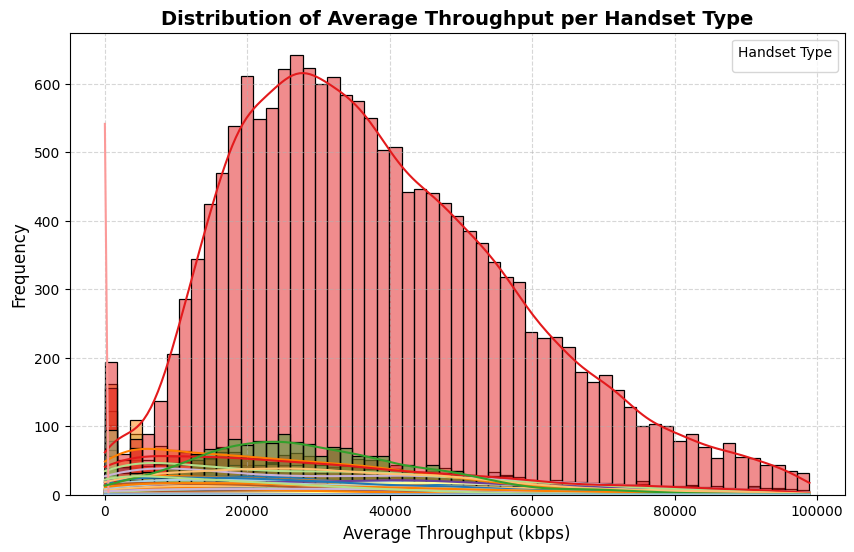

In [23]:

# Set custom color palette
custom_palette = sns.color_palette("Paired")

# Plot histogram of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg Bearer TP DL (kbps)', hue='Handset Type', kde=True, palette=custom_palette)
plt.title('Distribution of Average Throughput per Handset Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Throughput (kbps)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Handset Type', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\selam\AppData\Local\Temp\ipykernel_5756\1551809235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', palette=custom_palette)
C:\Users\selam\AppData\Local\Temp\ipykernel_5756\1551809235.py:9: UserWarning: 
The palette list has fewer values (8) than needed (1031) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', palette=custom_palette)


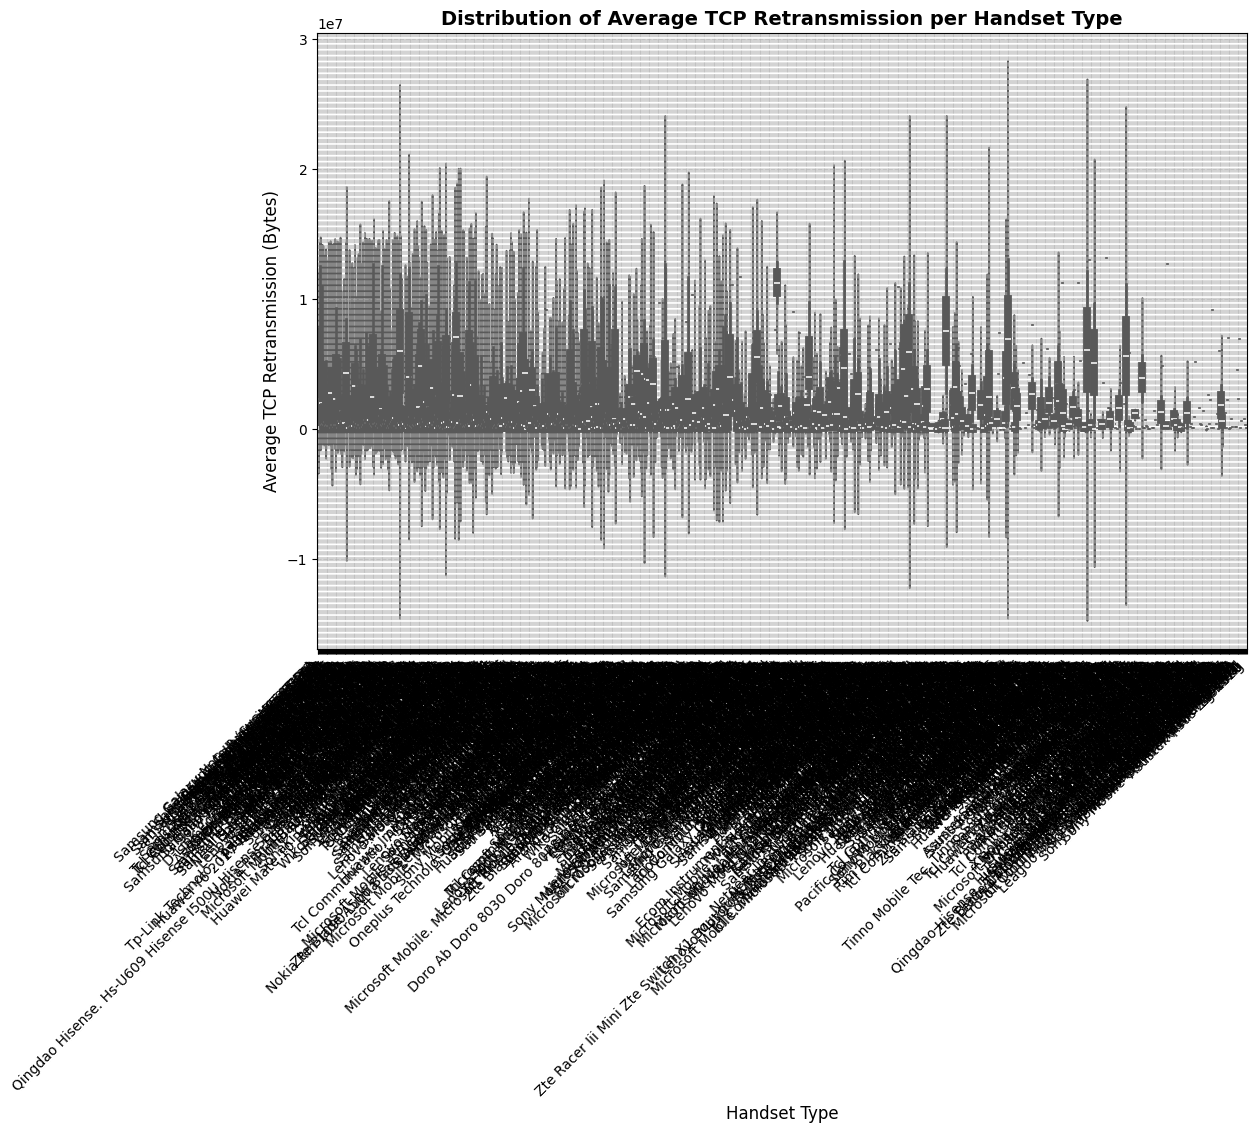

In [25]:

# Plot box plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', color='skyblue')
plt.title('Distribution of Average TCP Retransmission per Handset Type', fontsize=14, fontweight='bold')
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Average TCP Retransmission (Bytes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\selam\AppData\Local\Temp\ipykernel_5756\1514216671.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='Handset Type', x='TCP DL Retrans. Vol (Bytes)', ci=None, palette=custom_palette)
C:\Users\selam\AppData\Local\Temp\ipykernel_5756\1514216671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Handset Type', x='TCP DL Retrans. Vol (Bytes)', ci=None, palette=custom_palette)
C:\Users\selam\AppData\Local\Temp\ipykernel_5756\1514216671.py:6: UserWarning: 
The palette list has fewer values (10) than needed (1031) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, y='Handset Type', x='TCP DL Retrans. Vol (Bytes)', ci=None, palette=custom_palette)


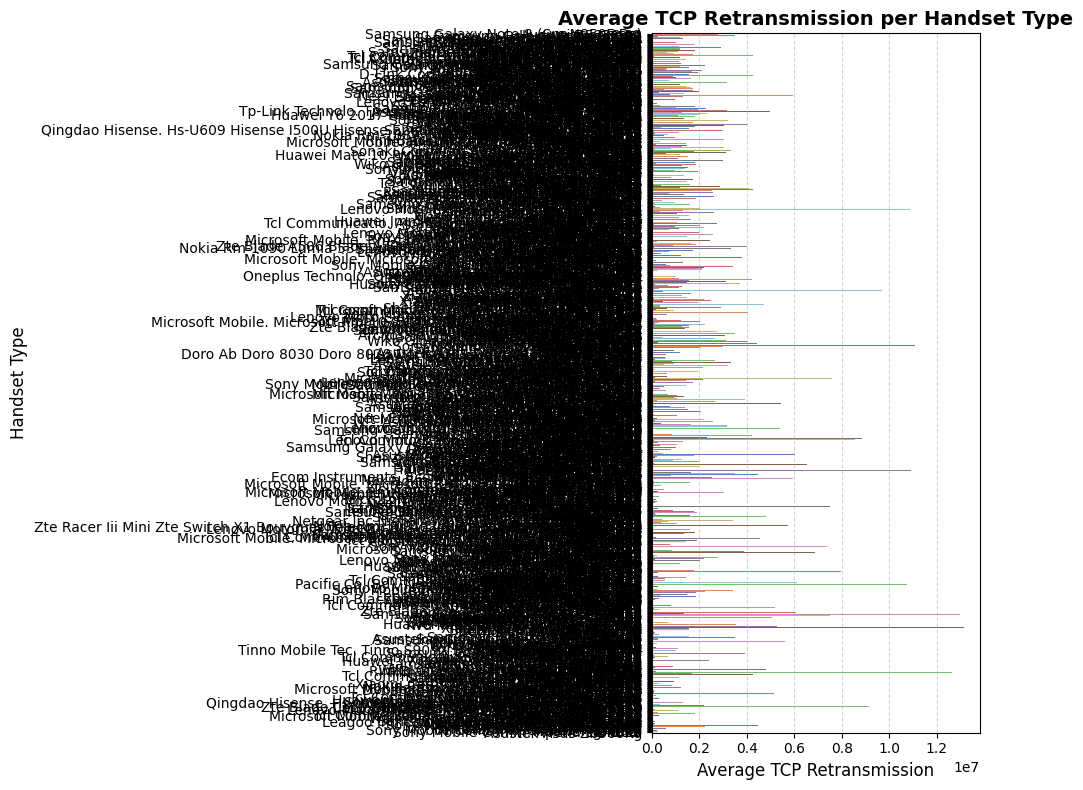

In [30]:

# Set a custom color palette
custom_palette = sns.color_palette("muted")

# Plot horizontal bar plot of average TCP retransmission per handset type
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility
sns.barplot(data=df, y='Handset Type', x='TCP DL Retrans. Vol (Bytes)', ci=None, palette=custom_palette)
plt.title('Average TCP Retransmission per Handset Type', fontsize=14, fontweight='bold')
plt.xlabel('Average TCP Retransmission', fontsize=12)
plt.ylabel('Handset Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()


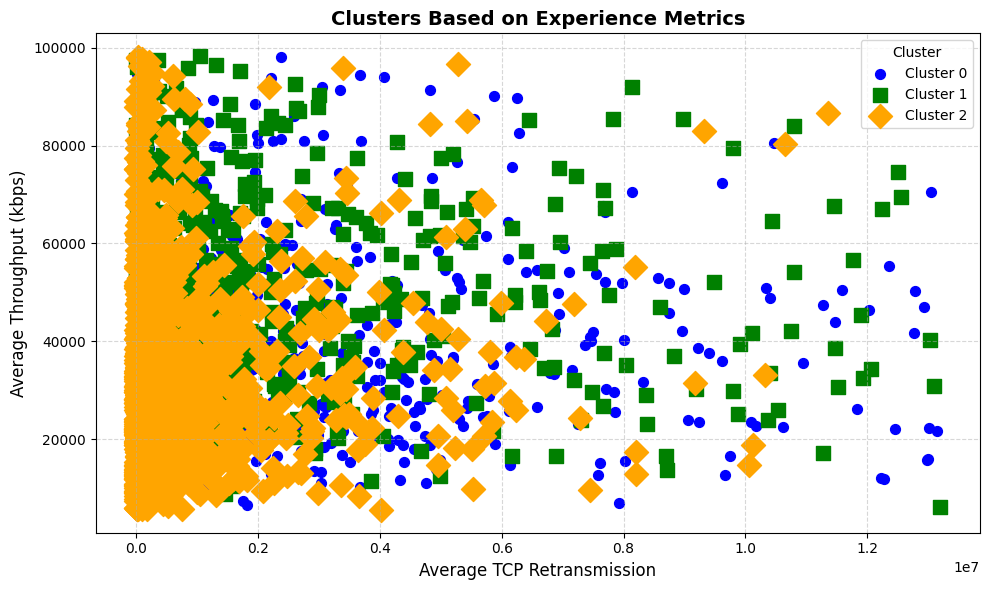

In [28]:

# Set custom marker styles, sizes, and colors for each cluster
markers = ['o', 's', 'D']  # Marker styles
sizes = [50, 100, 150]      # Marker sizes
colors = ['blue', 'green', 'orange']  # Marker colors

# Plot scatter plot of clusters based on experience metrics
plt.figure(figsize=(10, 6))
for i, cluster in enumerate(clustered_df['Cluster'].unique()):
    cluster_data = clustered_df[clustered_df['Cluster'] == cluster]
    plt.scatter(cluster_data['TCP DL Retrans. Vol (Bytes)'], cluster_data['Avg Bearer TP DL (kbps)'],
                label=f'Cluster {cluster}', marker=markers[i], s=sizes[i], color=colors[i])

plt.title('Clusters Based on Experience Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Average TCP Retransmission', fontsize=12)
plt.ylabel('Average Throughput (kbps)', fontsize=12)
plt.legend(title='Cluster', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()
plt.show()
